# Statistical inference via data science

Let's explore the main statistical concepts required for statistical inference.

We are three major areas of focus:

- Estimation of unknown parameters of the statistical model
- Select the best model for the data
- Do prediction with our model

There are two main approaches for statistial inference:

- Likelihood inference
- Bayesian inference

Note: the `practice_probabilites_and_descriptive_statistics.ipynb` notebook shows in practice how the Law of Large Numnbers (LLN) and Central Limit Theorem (CLT) work.

## 1. Law of large numbers (LNN) in short

**The relative frequency of an event X approaches its true probability as the number of trials increases.**

$$\overline{x} \to \mu$$  
$$n \to \infty$$
$$\overline{x} = \frac{\sum_{i=1}^{n}(x_{i})}{n}$$

- $\mu$ is the true average
- $n$ is the number of trials
- $x_{i}$ is the experiment value in trial $i$.

![Source: https://en.wikipedia.org/wiki/Law_of_large_numbers](https://i.imgur.com/G5Avq9O.png)

- (1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5 (true probability)
- Increase n. trials -> observed averages approach true probbability

## 2. Central limit theorem (CLT) in short

**The sampling distribution of the sample mean is ~normally distributed, regardless of the distribution of the underlying random sample.** Variables should be independent, identically distributed, n > 30.

- From LNN (pop. mean approximated by the mean of the sampling distribution

$$\mu_M = \mu$$

- Variance of sampl. distr. is the population variance divided by the sample size

$$\sigma^{2}_M = \frac{\sigma^{2}}{N}$$

- Std. deviation of the sampl. distr. of the mean is therefore

$$\sigma_{M}=\frac{\sigma}{\sqrt{N}}$$

- Larger sample size -> smaller std. deviation of the sampling distribution of the mean

![Source: https://en.wikipedia.org/wiki/Central_limit_theorem](https://i.imgur.com/kGryqBl.png)

- As the number of die rolls (samples) increases the sampling distribution (of the sample mean) becomes close to a normal distribution

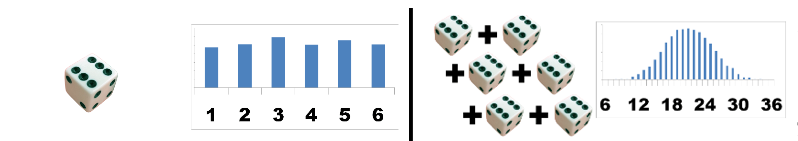

## 3. LLN & CLT in practice

### 3.1 Increasing sample size n

At what sample size n does the norma distribution make a good approximation of the actual distribution of the sample mean?

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import exponential distribution
from scipy.stats import expon

# number of samples
n = 40

# lambda value and mean expected value of an exponentially distributed random variable
lambda_val = 0.2
mean_val = 1 / lambda_val

# empty list
means = []

# random draws from exp. distr. 100000x
for i in range(100000):
    mean_sample = np.mean(expon.rvs(size=n, scale=mean_val))
    means.append(mean_sample)
    
# mean of sample means
mean_of_sample_means = np.mean(means)

In [2]:
mean_of_sample_means, mean_val

(5.003368304246323, 5.0)

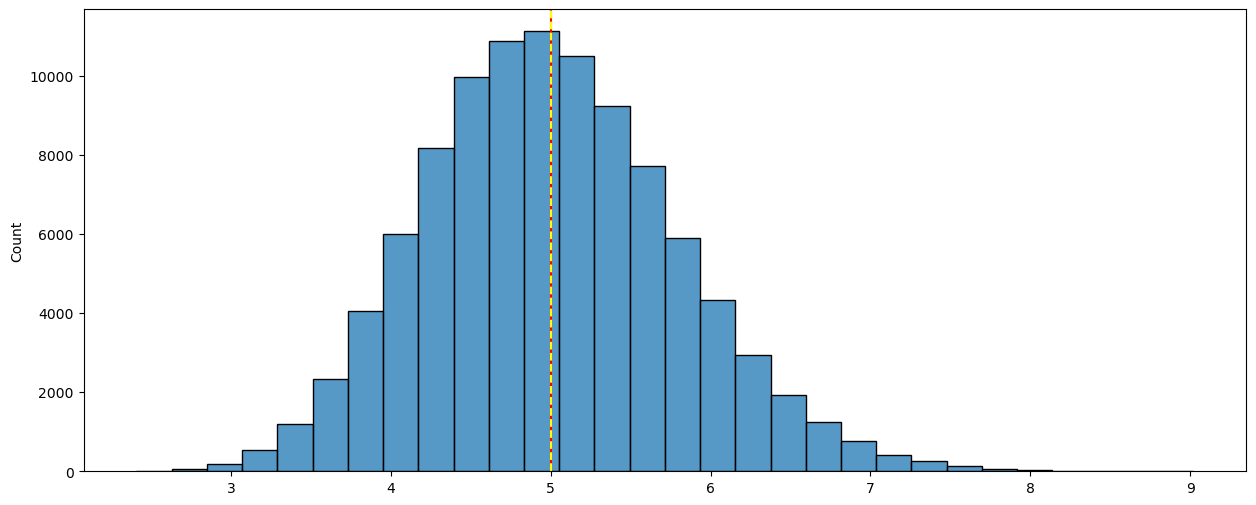

In [3]:
# plot means vs actual mean value vs mean of sample means
plt.figure(figsize=(15, 6))
ax = sns.histplot(means, bins=30)
ax.axvline(mean_val, color='red')
ax.axvline(mean_of_sample_means, color='yellow', linestyle='--')

In [4]:
# hist -> distribution of sample means
# red -> actual true mean value
# yellow -> mean of the sample means distribution

### 3.2 Calculating the sampling distribution of the mean

What is the sampling distribution of the mean for a specific sample size?

In [5]:
# import norm distr
from scipy.stats import norm

# define pop_mean, pop_std, sample_size
pop_mean = 90
pop_std = 36
sample_size = 9

# standard deviation of the sampling distribution of the mean
std_sampling_distr_mean = pop_std / np.sqrt(sample_size)

# sampling distribution
sample = norm.rvs(size=100000, loc=pop_mean, scale=std_sampling_distr_mean, random_state=1)
np.mean(sample)

90.0630363418762

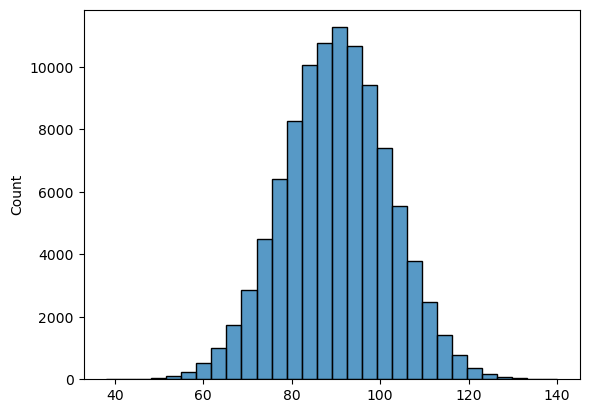

In [6]:
# plot sampling distribution
sns.histplot(sample, bins=30);

## 4. Estimators (and estimates)

- The main point of estimation is to draw information from obtained data

- Statistical inference refers to the process of drawing conclusions from the model estimation

- **An Estimator:** is a statistic (arbitrary function of a random sample), used to extract information of a parameter from the random sample.
It is expressed as a function of X.

- **An Estimate:** is the value of the evaluated estimator computed based on the data (realizations of the random sample)
It is computed based on $x_1, x_2, ..., x_n$
and is usually denoted by $\hat{\theta}$ for a parameter $\theta$

- An estimator is a function, and an estimate is a value of this function. Usually we are interested in estimates that maximize certain function

- Note: estimates can be either `point estimates` or `interval estimates`

- Note2: interval estimates have an attached `confidence interval level` used to express the precision and uncertainty associated with a particular sampling method

- Note3: interval estimates consist in a point estimate, a confidence level and a margin of error

### 4.1 Construction of estimators

- **Maximum likelihood**: finds maximum of the likelihood function to estimate parameters of probability distribution. Its goal is to find a model under which observed data is most probable

-  **Method of moments**: equates values of sample moments to population moments. Moments are the functions describing the parameter. Mean, variance, skewness, and kurtosis are all moments

-  **Bayesian methods**: introducing a frequency function for the parameter being estimated

### 4.2 What makes a good estimator

- **Consistency**: the larger the sample size, the more "accurate" the estimate (the more data collected, the closer the estimator will be to the real population parameter we're trying to measure)

- **Unbiased**: the expected value equals the true value (on average, it hits the true parameter value)

## 5. Frequentist vs Bayesian approach

- Both assess the probability of future observations based on obs. or hypothesis

- **Frequentist approach**: interprets the likelihood of an event as relative frequency of a repeatable random event (only this kind of event has probabilities for this approach)

- **Bayesian approach**: starts from what has been observed and assesses possible future outcomes

![](https://i.imgur.com/hIvZ6Hh.png)

### 5.1 Bayes' rule

(from theory notebooks)

The Bayesian approach to statistical inference is based on the Bayes' Rule:

$$P(A \mid B)=\frac{P(B \mid A) P(A)}{P(B)}$$

- Where $A$ and $B$ are events

- $P(B)$ is not $0$

- $P(A \mid B)$ means "probabilityy of A occurring `given` that B occurs

- Can use probability to represent the uncertainty in any event or hypothesis

#### 5.1.1 Bayes in practice

If the probability of spots given smallpox is 0.9, the probability to smallpox is 0.001, and the probability of spots in 0.081. What is the probability of smallpox given spots?

In [7]:
# likelihood
# P(spots|smallpox) = 0.9
p_spots_given_smallpox = 0.9

# prior
# P(smallbox) = 0.001
p_smallpox = 0.001

# marginal likelihood
# P(spots) = 0.081
p_spots = 0.081

# find posterior -> P(smallbox|spots)
p_smallbox_given_spots = p_spots_given_smallpox * p_smallpox / p_spots
p_smallbox_given_spots

0.011111111111111112

## 6. Inferential statistics

Process of taking samples from a larger population and using that data to draw conclusions about the populations, make decisions on the basis of those conclusione and predict future behavior.

- Experimental design

- Boostrapping

- Permutation tests

### 6.1 Experimental design

- How participants are allocated to the different groups in an experiment

- Test whether the independent variable has an effect on the dependent variable in the hypothesis

- A/B testing or A/A testing (same treatment split groups)

- Experiment setup **between subjects** where each group receives a different variant of a treatment (unbiased view)

- Experiment setup **within subjects** more prone to bias

- **Treatment group** is the group to which the treatment condition is applied

- **Control group** is the group where no treatment is given or made

- **Control conditions** are important to minimize the changes in all other variables except the one being tested during the experiment

#### 6.1.1 Experimental design variants

- Randomized controlled trial (treatment to treatment group and fake treatment to the control group, groups are randomly created)

- Single-blinded (patients have no information that could influence the result)

- Double-blinded (patients and experimenters have no information that could influence the results)

- Triple-blinded(patients, experimenters and committee monitoring have no information that could influence the results)

#### 6.1.2 Level of measurement

- Interval | Ratio | Nominal | Ordinal

### 6.2 Bootstrapping

- It is often desired to perform repeated sampling from a population but it may be expensive, impractical or just not possible (i.e. samples destroyed during sampling)

- **We resample from the best approximation of the population we have, which is the sample itself (producing a bootstrap distribution)**

Step-by-step boostrapping:

  1. Use the original sample to represent the population
  
  2. Take repeated samples from the orginal sample (sample of sample is called re-sample)
  
  3. Use these re-samples to calculate an estimate for the population statistic (mean or median)
  
  4. Gather all calculated values to  produce a distribution of estimates (e.g. distribution of means or medians)

#### 6.2.1 Bootstrapping in practice

In [8]:
# take the sample drawn from a population with unknown distirbution
# re-sample with replacement 10k times
# computer a vector with the means of each re-sample
# plot their sample means

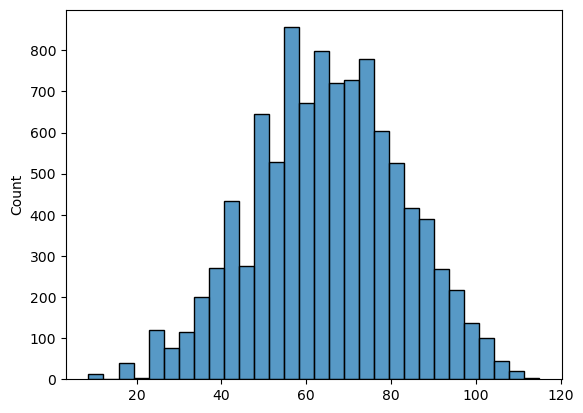

In [13]:
# sample
sample = [8, 12, 58, 94, 103, 115]

# sample means empty list
sample_means = []

# taken random sample 10k times
for i in range(10000):
    boot_sample = np.random.choice(sample, size=len(sample), replace=True)
    boot_sample_mean = np.mean(boot_sample)
    sample_means.append(boot_sample_mean)
    
# plot
sns.histplot(sample_means, bins=30);

#### 6.2.2 Calculating CI from bootstrapping

In [14]:
# 95% CI
ci_bm = np.percentile(sample_means, [2.5, 97.5])
ci_bm

array([30.62916667, 98.5       ])

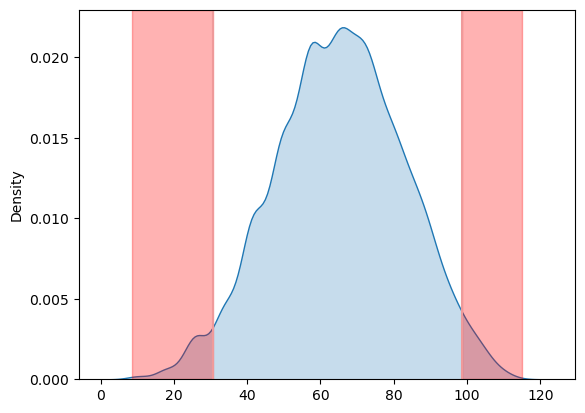

In [18]:
# plot CI
ax = plt.subplots()
ax = sns.kdeplot(sample_means, shade=True)

# percentile line values (upper and lower)
p1 = plt.axvline(x=ci_bm[0],color='#EF9A9A')
p2 = plt.axvline(x=ci_bm[1],color='#EF9A9A')

# CI created by taking the min value of sample means and the lower ci_bm and same for upper bound
ax.axvspan(min(sample_means), ci_bm[0], alpha=0.3, color='red')
ax.axvspan( ci_bm[1], max(sample_means), alpha=0.3, color='red');

### 6.3 Permutation tests

- Alternative resampling method in addition to bootstrapping

- If the treatment had no effect, then observations should randomly fall into the two groups and any of these rearrangements (permutations) would be equally likely

- Relies only on the possible rearrangements of the observations in the two groups

For hypothesis testing:

  - $H_0$: The observations are exchangeable across groups

  - $H_1$: The observations are not exchangeable across groups (the current arrangement into groups was not due to chance)

#### 6.3.1 Permutations in practice

In [21]:
# create a sample dataset for an experiment on plants

import pandas as pd

x = range(30)
weight = [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 
          5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 
          4.32, 4.69, 6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 
          6.15, 5.80, 5.26]

groups = list(np.repeat(['ctrl'], 10)) + list(np.repeat(['trt1'], 10)) + list(np.repeat(['trt2'], 10))

plant_growth = pd.DataFrame({
    'X': x,
    'weight': weight,
    'groups': groups
})

plant_growth

,X,weight,groups
0,0,4.17,ctrl
1,1,5.58,ctrl
2,2,5.18,ctrl
3,3,6.11,ctrl
4,4,4.50,ctrl
5,5,4.61,ctrl
6,6,5.17,ctrl
7,7,4.53,ctrl
8,8,5.33,ctrl
9,9,5.14,ctrl


In [22]:
# did treatment2 have an effect?
# in other words: is this grouping of obs. into treatment/control groups likely to have happened randomly?

In [27]:
# STEP 1: get all possible rearrangements of these observations into the two groups

from itertools import combinations

# data
x = plant_growth[plant_growth.groups=="ctrl"]['weight']
y = plant_growth[plant_growth.groups=="trt2"]['weight']

# n
n = len(x) + len(y)

# get all combinations (order is not relevant as opposite for permutations)
perm_control = list(combinations(x.tolist() + y.tolist(), n//2))
perm_control = np.array(perm_control)

# trick to get the corresponding observations for treatment group
perm_training = np.flip(perm_control, axis=0)

In [28]:
# STEP 2: for each rearrangement (permutation) calculate the difference in group means

mean_diff_actual = np.mean(perm_control, axis=1) - np.mean(perm_training, axis=1)
mean_diff_actual

array([-0.494, -0.26 , -0.498, ...,  0.498,  0.26 ,  0.494])

In [29]:
mean_diff_obs = np.mean(x) - np.mean(y)
mean_diff_obs

-0.4939999999999998

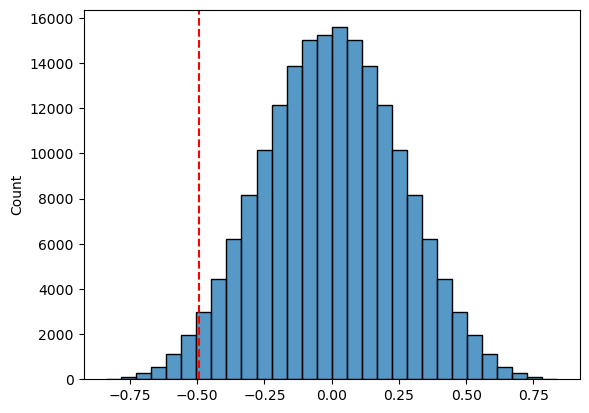

In [33]:
# STEP 3 compare the difference we observed tot he distribution of possible differences in all permutations

sns.histplot(mean_diff_actual, bins=30)
plt.axvline(mean_diff_obs, color='red', linestyle='--');